## Automatic Speech Recognition(ASR) for Swahili.

### Business understanding.



Automatic speech recognition (ASR) is a computer speech recognition that enables a program to process human speech into written format. A Swahili ASR is, therefore, capable of converting Swahili speech to written format. Such a program will be of use to swahili Speakers and can be used in various applications, for instance, search by voice on websites and building of virtual assistant technology based on the ASR model. Swahili language spoken in various countries especially in East and Central Africa. The Swahili ASR will be of use to many people. Consequently, the aim of this project will be to build an Automatic Speech Recognition Model for the Swahili language and deploy as a web service using flask.

### Data understanding

The data that will be used in this project was obtained from [Mozilla Common Voice](https://commonvoice.mozilla.org/en/datasets). It contains thousands of audios in Swahili and their corresponding transcripitions. The audios are diverse to ensure that the model is trained on various voices and avoid building a biased model. The corresponding transcriptions will also be used to train the model. An extra fine-tuned Swahili language model will be used to improve the models output and ensure that the written format is as close as possible to the speech.

### Exploring the dataset

In [1]:
# Importing and mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Changing to the respective directory
import os
os.chdir('/content/drive/MyDrive/SWAHILI_ASR')

In [3]:
# Importing the relevant libraries
import pandas as pd
# Loading the dataset with transcripitions
transcriptions = pd.read_csv("train.tsv",sep ="\t",low_memory = False)
transcriptions.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0133d8ddf5c1a3c678fde017e0b07d2835bfd707d5b3ec...,common_voice_sw_31428161.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,twenties,female,NaN,NaN,sw,NaN
1,41ba4752c376dc7f0502f9c97728bf2f54e47972f3b6e4...,common_voice_sw_30356664.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,fourties,female,NaN,NaN,sw,NaN
2,01c95772efd3fbe4a1122206c7474c77ed6591c8c9fb00...,common_voice_sw_30317714.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,NaN,NaN,NaN,NaN,sw,NaN
3,055aa825d52f0b81c0861c88ba4999b8bf91b92e90866c...,common_voice_sw_30055356.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,twenties,female,NaN,NaN,sw,NaN
4,0244639ffd7ec755a01b21ea204735ca3c44443e9cf46c...,common_voice_sw_29002392.mp3,Inajulikana kama shina la Warangi.,2,0,NaN,NaN,NaN,NaN,sw,NaN


In [4]:
# Exploring the length of the tsv file
print(len(transcriptions))

82070


In [5]:
# Exploring how many transcriptions have down votes greater than zero
len(transcriptions[transcriptions["down_votes"]>0])

26616

In [6]:
# Exploring how many transcriptions have down votes greater than one
len(transcriptions[transcriptions["down_votes"]>1])

3845

In [7]:
# Exploring how many transcriptions have down votes greater than two
len(transcriptions[transcriptions["down_votes"]>2])

1271

In [8]:
transcriptions[transcriptions["up_votes"]==0]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment


In [9]:
transcriptions[transcriptions["up_votes"]==1]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment


From the above outputs it can be seen that all audios have an up_vote greater than one. However, on sampling some of the audios with down_votes it can be realised that most audios with down_votes of two or less are okay. However, one audio with a down_vote of five seemed to have a lot of noise. Therefore, as a rule of thumb, we can avoid audios with a down_vote greater than two.

In [10]:
# Exploring the variability of the dataset on the basis of age
transcriptions['age'].value_counts()

twenties    36762
thirties     7462
fourties     4001
fifties      3865
sixties       506
teens         100
Name: age, dtype: int64

<Axes: >

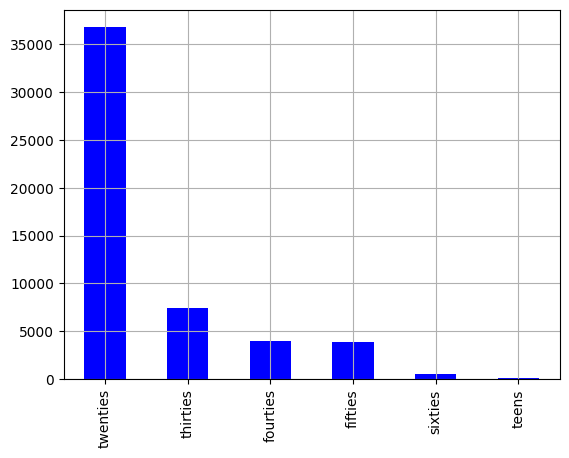

In [11]:
# Plotting the variability on the basis of age
transcriptions['age'].value_counts().plot(kind='bar',grid=True,colormap='winter')

The data seems to be diverse and tries to capture the voices of most age groups.However the teens and sixties audios are not that much.

In [12]:
# Exploring the variability of the dataset on the basis of gender
transcriptions['gender'].value_counts()

female    30325
male      23549
other        36
Name: gender, dtype: int64

<Axes: >

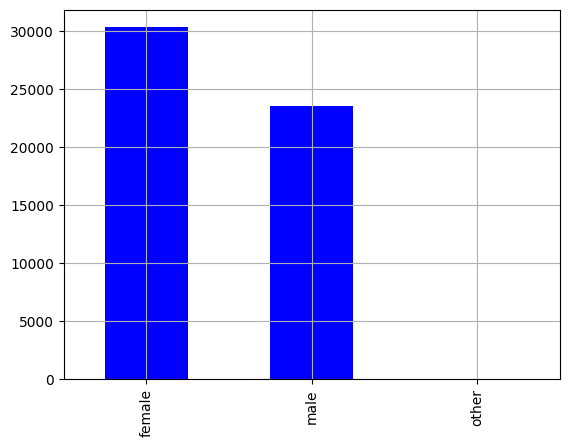

In [13]:
# Plotting the variability of the dataset on the basis of gender
transcriptions['gender'].value_counts().plot(kind='bar',grid=True,colormap='winter')

The data captures the gender audiod in a seemingly unbiased manner

In [14]:
# Exploring to see if the dataset contains audios with a different locale than Swahili
transcriptions['locale'].unique()

array(['sw'], dtype=object)

Only Swahili audios are used as it should be, since we are building a Swahili ASR

### Data preprocessing

In [15]:
# Taking a look at the dataset
transcriptions.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0133d8ddf5c1a3c678fde017e0b07d2835bfd707d5b3ec...,common_voice_sw_31428161.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,twenties,female,NaN,NaN,sw,NaN
1,41ba4752c376dc7f0502f9c97728bf2f54e47972f3b6e4...,common_voice_sw_30356664.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,fourties,female,NaN,NaN,sw,NaN
2,01c95772efd3fbe4a1122206c7474c77ed6591c8c9fb00...,common_voice_sw_30317714.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,NaN,NaN,NaN,NaN,sw,NaN
3,055aa825d52f0b81c0861c88ba4999b8bf91b92e90866c...,common_voice_sw_30055356.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,twenties,female,NaN,NaN,sw,NaN
4,0244639ffd7ec755a01b21ea204735ca3c44443e9cf46c...,common_voice_sw_29002392.mp3,Inajulikana kama shina la Warangi.,2,0,NaN,NaN,NaN,NaN,sw,NaN


In [16]:
# Dropping irrelevant columns
transcriptions.drop(['age','gender','accents','variant','locale','segment'],axis=1,inplace=True)

In [17]:
transcriptions.columns

Index(['client_id', 'path', 'sentence', 'up_votes', 'down_votes'], dtype='object')

#### Dealing with missing values

In [18]:
# Checking for missing values
transcriptions.isna().sum()

client_id     0
path          0
sentence      0
up_votes      0
down_votes    0
dtype: int64

The new dataset has no missing values.

#### Dealing with duplicates

While duplicated data can be advantageuous since it helps increase the size of the dataset, it can result in a biased model in extreme situations.We can define a duplicate has having the same client_id sentence and or path. We will therefore check for duplicates while subsetting it to the said columns.If there are duplicates in extreme levels we will have to drop them.

In [19]:
# Checking for duplicates with client_id and sentence as the subset
transcriptions.duplicated(subset=['client_id','sentence']).sum()

0

In [20]:
# Checking for duplicates with path as the subset
transcriptions.duplicated(subset=['path']).sum()

0

The dataset has no duplicates. We can now create a dataframe containing only the transcriptions(text) and the path.

In [21]:
transcriptions_df = pd.DataFrame(transcriptions[['sentence','path']])
transcriptions_df.head()

,sentence,path
0,wachambuzi wa soka wanamtaja Messi kama nyota ...,common_voice_sw_31428161.mp3
1,wachambuzi wa soka wanamtaja Messi kama nyota ...,common_voice_sw_30356664.mp3
2,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30317714.mp3
3,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30055356.mp3
4,Inajulikana kama shina la Warangi.,common_voice_sw_29002392.mp3


## Further preprocessing

Next we will match the audios to their respective transcriptions using the audio names. We will create a class that will do this and also convert the audios to a WAV format since we are using a wav2vec2 acoustic model.

In [22]:
# Creating a class to convert the audios to WAV form and match each audio to its respective transcription.
# Installing the relevant libraries
!pip install pydub
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [23]:
# Importing the relevant libraries
import torchaudio
from torch.utils.data import Dataset,DataLoader
from pydub import AudioSegment
import torch
import tempfile
from transformers import Wav2Vec2Processor

In [ ]:

audio_transcription_map = dict(zip(transcriptions_df['path'], transcriptions_df['sentence']))

# Step 3: Process the audio files
audio_folder_path = "/content/drive/MyDrive/SWAHILI_ASR/train"

for audio_name in audio_transcription_map.keys():

  audio_file_path = f"{audio_folder_path}/{audio_name}"  # Adjust the file extension based on your audio format

    # Now you can process the audio file and its transcription
  transcription = audio_transcription_map[audio_name]

    # Add your processing code here, e.g., print the pair
  # print(f"Audio File: {audio_file_path}, Transcription: {transcription}")



  # Load audio file and convert to WAV using pydub
  audio = AudioSegment.from_file(audio_file_path)
  audio = audio.set_frame_rate(16000)

  # Create a temporary WAV file
  temp_wav_file = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
  temp_wav_file_path = temp_wav_file.name
  temp_wav_file.close()

  audio.export(temp_wav_file_path, format="wav")

  # Load the converted audio file using torchaudio
  waveform, sample_rate = torchaudio.load(temp_wav_file_path)

  # Remove the temporary WAV file
  os.remove(temp_wav_file_path)

  # Tokenize and encode the audio using the Wav2Vec2 processor
  processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
  inputs = processor(waveform.squeeze().numpy(), return_tensors="pt", sampling_rate=sample_rate)


  print(f"Inputs {inputs}")





Inputs {'input_values': tensor([[7.6913e-05, 7.6913e-05, 7.6913e-05,  ..., 7.6913e-05, 7.6913e-05,
         7.6913e-05]])}
Inputs {'input_values': tensor([[0.0007, 0.0007, 0.0007,  ..., 0.0007, 0.0007, 0.0002]])}
Inputs {'input_values': tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])}
Inputs {'input_values': tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])}
Inputs {'input_values': tensor([[0.0007, 0.0007, 0.0007,  ..., 0.0007, 0.0007, 0.0007]])}
Inputs {'input_values': tensor([[-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])}
Inputs {'input_values': tensor([[0.0006, 0.0006, 0.0006,  ..., 0.0006, 0.0006, 0.0006]])}
Inputs {'input_values': tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002, -0.0014, -0.0014]])}
Inputs {'input_values': tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006]])}
Inputs {'input_values': tensor([[0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002]])}
Inputs {'input_values': tensor([[0.00

KeyboardInterrupt: 

### Normalizing and removing special characters

Special characters i.e ,.? cannot be represented as acoustic sounds. Since we are dealing with an acoustic model we will have to remove these characters as they only add to the model complexity. We will also normalize all transcriptions to lowercase. There is no difference in sound between V and v.

We will start by taking a look at some of the transcriptions in the sentence column.

In [24]:
transcriptions_df['sentence'].sample(10)

450      Wapolandi wengi walikutana na Wanafunzi wa Bib...
20683    Ilijengwa kati ya mwaka elfu moja mia tisa na ...
46187           Akafuata mtawala Kalemera aliyetawala hapo
34940    Pori la Akiba Ibanda likiwa na ukubwa wa kilom...
30130    Shanga nyeupe zilitengenezwa kutoka udongo pem...
32724    Maamuzi na vitendo vya Jacob vilikwenda kwa ka...
74012            Pato la wananchi na maendeleo wilaya hiyo
14872    Wachezaji wamejipanga katika mfumo wa mbili ta...
73179      mpaka kufa hawajawahi kufurahia Je hakuna namna
51452    Walioupa heshima kubwa mziki wa sukusi pia bol...
Name: sentence, dtype: object

In [25]:
# Setting the display in order to see the entire columns
pd.set_option('display.max_colwidth',None)
transcriptions_df['sentence'].sample(10)

22318    Ambao ni mfumo wa maisha walioukubali katika kuendesha maisha ya familia na jamii zao
28948                                                Meli za kibiashara mia moja sitini na nne
65383                                           ni namna gani shirika hili limeweza kufanikiwa
50188                   kupandisha bendera ya wajerumani kwenye himaya yao vilevile kuwaruhusu
5187                                   Kanda hii ina hifadhi za taifa na hifadhi mchezo kadhaa
18657                                               mourinho alishindwa kuipa mataji tottenham
76773                          Alipata pia maadui kati ya wakulima na matajiri wa zao la kakao
75429                                                    Hungaria ilipata bunge lake la pekee.
16715                    Hudhaniwa pia kuwa Wanyaturu na Wakushi wa Ethiopia asili yao ni moja
20410                                                           Tutavaa nguo za rangi nyekundu
Name: sentence, dtype: object

In [26]:
# Normalize the transcriptions to lowercase
transcriptions_df['sentence']=transcriptions_df['sentence'].apply(lambda x: x.lower())

In [27]:
# Removing the special characters
import re
transcriptions_df['sentence'] = transcriptions_df['sentence'].str.replace(r'[,.?!-_:;\"]','',regex=True)
transcriptions_df['sentence']

0                       wachambuzi wa soka wanamtaja messi kama nyota hatari zaidi duniani
1                       wachambuzi wa soka wanamtaja messi kama nyota hatari zaidi duniani
2           romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano
3           romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano
4                                                        inajulikana kama shina la warangi
                                               ...                                        
82065                hapo nadhani nawe unazikumbuka ajali kadhaa ambazo tayari zimshatokea
82066                         juu zaidi usimbishaji unapungua tena hadi milimita mia mbili
82067                              lakini hakuwa na muda mwingi wa kucheza kwani ilipofika
82068    hivi sasa ukoo huo wakichifu uko kwenye mchakato wa kutafiti mrithi wa kiti hicho
82069     akadai ibada ziendeshwe katika lugha za watu na si tena katika lugha ya kilatini

In [28]:
# Resetting the display
pd.reset_option('display.max_colwidth')
transcriptions_df.head()

,sentence,path
0,wachambuzi wa soka wanamtaja messi kama nyota ...,common_voice_sw_31428161.mp3
1,wachambuzi wa soka wanamtaja messi kama nyota ...,common_voice_sw_30356664.mp3
2,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30317714.mp3
3,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30055356.mp3
4,inajulikana kama shina la warangi,common_voice_sw_29002392.mp3


### Creating a Wav2Vec2CTCTokenizer

A wav2vec2 model consists of a tokenizer and feature extractor.The feature extractor converts the audio inputs to the format required by the model and the tokenizer converts the model output to text.

For the tokenizer we will create a dictionary consisting of words as keys and their corresponding number as values.Space will also be included in the dictionary since the model needs to learn to predict when a word is finished.

In [47]:
# Creating a dictionary for the tokenizer
# The '|' will act as the word delimiter
vocab_dict = {letter: index for index,letter in enumerate("|abcdefghigklmnopqrstuvwxyz")}
vocab_dict

{'|': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 10,
 'h': 8,
 'i': 9,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

Some swahili words contain apostrophe(') for instance "ng'ombe" we will have to include it in the dictionary. This is why (') was not included in the regex pattern that was created.

In [48]:
# Adding "'" to the dictionary
vocab_dict["'"]=27
vocab_dict

{'|': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 10,
 'h': 8,
 'i': 9,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 "'": 27}

Next we will add a padding token that corresponds to the CTC "blank token" and an unkown token to handle tokens not present in the dictionary.

In [49]:
vocab_dict["[UNK]"] = 28
vocab_dict["[PAD]"] = 29

In [54]:
vocab_dict

{'|': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 10,
 'h': 8,
 'i': 9,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 "'": 27,
 '[UNK]': 28,
 '[PAD]': 29}

In [55]:
# Saving the dictionary as a json file
# Importing the json library
import json
with open('vocab.json', 'w') as vocab_file:
  json.dump(vocab_dict,vocab_file)

In [56]:
# Checking to see if the file has been saved
with open('vocab.json', 'r') as vocab_file:
  dictionary = json.load(vocab_file)

print(dictionary)

{'|': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 10, 'h': 8, 'i': 9, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, "'": 27, '[UNK]': 28, '[PAD]': 29}


In [58]:
# Creating the Wav2Vec2CTCTokenizer using the loaded dictionary
from transformers import Wav2Vec2CTCTokenizer
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained('./',unk_token = '[UNK]',pad_token = '[PAD]',word_delimiter_token = '|')